# PROBLEM STATEMENT
Multi Layer Perceptron implementation on MNIST dataset, that contains handwritten numbers of Images, We load from Keras builtin datasets, predicting the numbers using TensorFlow Framework.



In [1]:
#Importing Necessary libraries
import matplotlib.pyplot as plt #Data Visualization
from keras.layers import Dense, Flatten # For creating the Neural Network Layers
from keras.models import Sequential # For creating a Sequential Model
from keras.utils import to_categorical # For converting the image labels to one-hot encoding values
from keras.datasets import mnist # Loading the MNIST dataset from keras
from keras import utils #For utility function

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the MNIST dataset
from keras.datasets import mnist

# Loading the dataset into training and testing set
(X_train,y_train),(X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Checking the shape of y_test array for understanding the size of shape of testing set labels
y_test.shape

(10000,)

In [4]:
# Checking the shape of the X_train for understanding the training set samples and its dimensions
X_train.shape

(60000, 28, 28)

* There are 10000 labels at the testing set
* There are 60000 training samples with 28 height and 28 width in training set

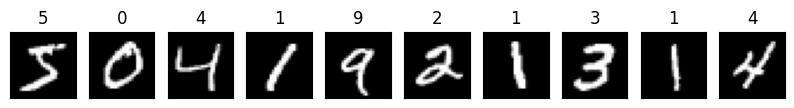

In [8]:
# Plotting first 10 images of the dataset
fig,axes = plt.subplots(ncols=10,sharex=False, sharey=True, figsize=(10,4))# First 10 col images is visualized, sharex subplot is not shared, sharey is shared
# Using for loop visualizing the first 10 images
for i in range(10):
  axes[i].set_title(y_train[i])#set the title of each images with ytrain labels
  axes[i].imshow(X_train[i],cmap='gray')#Show the images from X_train with the colormap as gray
  axes[i].get_xaxis().set_visible(False)#set the xaxis should not visible in the images
  axes[i].get_yaxis().set_visible(False)#set the yaxis should not visible in the images

plt.show()

In [9]:
# Converting the labels to categorical using One-hot encoding
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [11]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
# Checking the shape of the y_test array
print(y_test.shape)

(10000, 10)


In [13]:
# Model building
# Using Sequential model adding layers in the sequential format
model= Sequential()

# Use flatten layer to convert 28x28 input images to 1d array because MLP understands only 1d array
model.add(Flatten(input_shape=(28,28)))

#Use Dense layer with 10 neurons with sigmoid activation function
model.add(Dense(10, activation ='sigmoid'))

#Use Dense layer with 5 neurons with sigmoid activation function
model.add(Dense(5, activation = 'sigmoid'))

#Use Output layer as Dense with 10 neurons with softmax activation function
model.add(Dense(10, activation= 'softmax'))


In [14]:
# Lets observe the summary of the model and number of parameters in each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**1st DENSE LAYER**
* input neurons = 784
* output neurons= 10
* weight parameters  =784*10 =7840
* bias parameters = 10
* Total Parameters = 7840+10 = 7850

**2nd DENSE LAYER**
* input neurons = 10
* output neurons= 5
* weight parameters  =10*5 =50
* bias parameters = 5
* Total Parameters = 50+5 = 55

**3rd DENSE LAYER**
* input neurons = 5
* output neurons= 10
* weight parameters  =5*10 =50
* bias parameters = 10
* Total Parameters = 50+10 = 60

**TOTAL PARAMETERS**

7850+55+60 = 7965



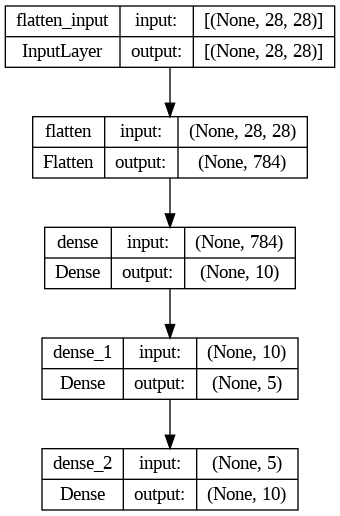

In [15]:
# Visualizing the architecture of the model with its layers
utils.plot_model(model, show_shapes=True)

In [16]:
# Since it is a multi class data we use loss function as categorical cross entropy, optimizer as Adam, metrics as accuracy
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["acc"])

In [17]:
# Train the model with training data and validate with testing data store in history with 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.8388 - acc: 0.4259 - val_loss: 1.4310 - val_acc: 0.5778
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2599 - acc: 0.6257 - val_loss: 1.1322 - val_acc: 0.6990
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0336 - acc: 0.7186 - val_loss: 0.9656 - val_acc: 0.7359
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8794 - acc: 0.7621 - val_loss: 0.8193 - val_acc: 0.7707
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8193 - acc: 0.7667 - val_loss: 0.7914 - val_acc: 0.7737
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7595 - acc: 0.7823 - val_loss: 0.7118 - val_acc: 0.8005
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7286 - acc: 0.7908 - val_loss: 0.7130 - val_acc: 0.7886
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

* From model training we observe loss is reduced and accuracy is increased for each epoch.

In [19]:
# Lets print the training loss and accuracy and validation loss and accuracy
print(history.history)

{'loss': [1.8387932777404785, 1.2598503828048706, 1.033631443977356, 0.8793639540672302, 0.819338321685791, 0.7595371603965759, 0.7286187410354614, 0.690861701965332, 0.6762500405311584, 0.6562928557395935], 'acc': [0.4258500039577484, 0.6256666779518127, 0.7185999751091003, 0.7621166706085205, 0.7666666507720947, 0.7822666764259338, 0.7907833456993103, 0.8068000078201294, 0.8111000061035156, 0.8185499906539917], 'val_loss': [1.4310071468353271, 1.1321908235549927, 0.9655937552452087, 0.8192901611328125, 0.7914403080940247, 0.7118139266967773, 0.7130387425422668, 0.6805827617645264, 0.6914153099060059, 0.6249423623085022], 'val_acc': [0.5777999758720398, 0.6990000009536743, 0.7358999848365784, 0.7706999778747559, 0.7736999988555908, 0.8004999756813049, 0.7886000275611877, 0.8217999935150146, 0.8052999973297119, 0.8330000042915344]}


In [20]:
# Save this model with hadoop extension
model.save('mnist_best_model.h5')

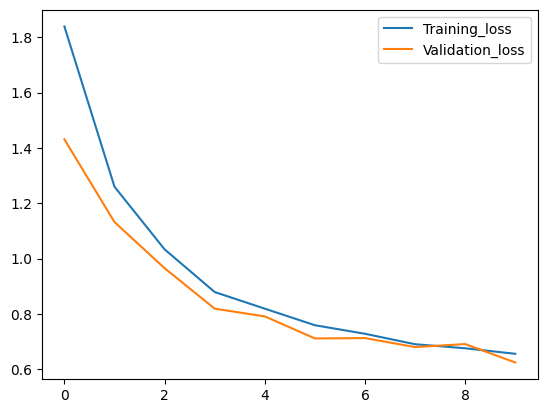

In [21]:
# Visualize the training and validation loss
plt.plot(history.history['loss'], label = 'Training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.legend()

From the visualization we can observe the difference where the loss is reduced on validation loss

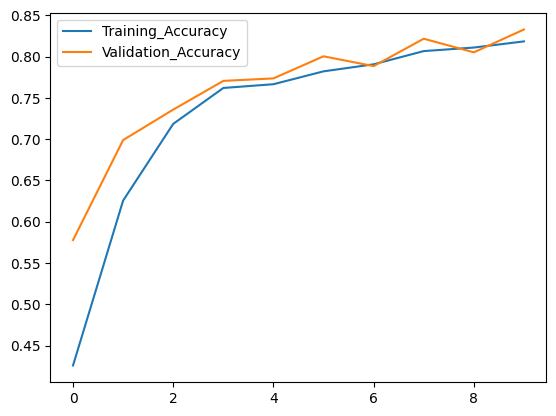

In [22]:
# Visualize the training and validation accuracy
plt.plot(history.history['acc'], label = 'Training_Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation_Accuracy')
plt.legend()

From the above plot we observe the validation accuracy is gradually increasing compared with Training accuracy.

In [23]:
# Lets import tensorflow

import tensorflow as tf

In [24]:
# Loading the pre-trained svaed model for prediction
model = tf.keras.models.load_model("mnist_best_model.h5")


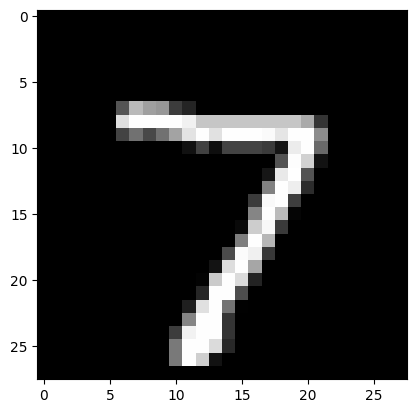

In [25]:
# Visualize the 1st image from test set
plt.imshow(X_test[0],cmap='gray')

In [26]:
# Predict the label with image
#Importing numpy
import numpy as np
# Reshape test image to match the input shape
X= np.reshape(X_test[0],(1,28,28))
# Use trained model to predict the label of the image
predicted_label = np.argmax(model.predict(X))
print(predicted_label)

1/1 [==============================] - 0s 194ms/step
7


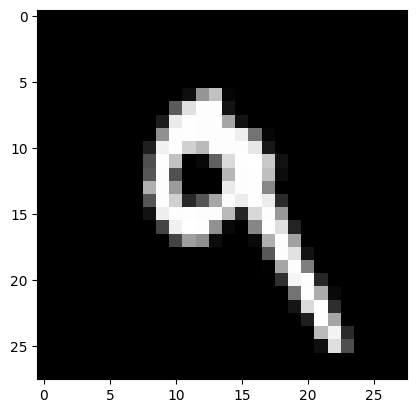

In [28]:
# Testing with the other image lets test with 7th image
plt.imshow(X_test[7],cmap='gray')

In [29]:
X= np.reshape(X_test[7],(1,28,28))
# Use trained model to predict the label of the image
predicted_label = np.argmax(model.predict(X))
print(predicted_label)

1/1 [==============================] - 0s 30ms/step
9
